#INVESTING A REAL ESTATE FOR THE STARTUP "BLACK GARLIC CAFE CHAIN" IN HUE CITY, VIETNAM

### Data Science Capstone Course

In [0]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

In [0]:
#lấy data từ wiki - https://utinokati.com/en/details/land-market-value/area/Tokyo/
#data = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
#data = requests.get('https://thuathienhue.gov.vn/vi-vn/Tra-cuu-gia-dat').text
#data = requests.get('https://www.geopostcodes.com/Hue').text
data = requests.get('https://vi.wikipedia.org/wiki/Th%E1%BB%83_lo%E1%BA%A1i:X%C3%A3,_ph%C6%B0%E1%BB%9Dng_thu%E1%BB%99c_th%C3%A0nh_ph%E1%BB%91_Hu%E1%BA%BF').text

In [0]:
#chuyển data thành đối tượng object của gói beautifulsoup 
soup = BeautifulSoup(data,'html.parser')

In [0]:
#Tìm tất cả các [hàng (dòng) thẻ 'tr':table row] - thẻ 'td':table data: là các cell
#table = soup.find('tbody')
#table
#new_feed = soup.find('table', class_='list2')
#new_feed.find('thead').find_all('tr')[0].find_all('th')[0].text.rstrip('\r\n')
new_feed = soup.find_all('li')

In [0]:
phuongs = []
for p in range(0,28):
  text=new_feed[p].text.split()
  if(len(text)>1):
    text = text[0]+" "+text[1]
    phuongs.append(text.rstrip(","))
  #text1 = text.rstrip("(phường)")
  #text2 = text.rstrip("Huế")
#phuongs.append('Thành Phố Huế')  
phuongs[24]='Vỹ Dạ'

In [6]:
df=pd.DataFrame(phuongs,columns=['Ward'])
df.index = np.arange(1, len(df) + 1) # reset the index so that it starts from 1. 
df.head()

,Ward
1,An Cựu
2,An Đông
3,An Hòa
4,An Tây
5,Hương Long


In [0]:
wards = []
latitudes = []
longitudes = [] 
geolocator = Nominatim(user_agent="Thua Thien Hue, Vietnam")
for p in phuongs:
  if(p not in ('An Tây','Phú Cát','Phú Hậu','Phú Hiệp','Phú Hội','Phú Nhuận','Phước Vĩnh','Phường Đúc','Trường An','Xuân Phú')):
    address = p+',Thừa Thiên Huế, Việt Nam'#'thanh pho Hue, Thua Thien Hue, Vietnam' - 'Phường Kim Long, Thành phố Huế, Thừa Thiên Huế, Việt Nam'
    #print(address)
    location = geolocator.geocode(address)
    latitude = str(location.latitude)
    longitude = str(location.longitude)
    wards.append(p)
    latitudes.append(latitude)
    longitudes.append(longitude)
    #print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))

df=pd.DataFrame(wards,columns=['Ward'])
df['Latitude']=latitudes#str(latitudes)#map(str,latitudes)
df['Longitude']=longitudes#str(longitudes)#map(str,longitudes)
#df.index = np.arange(1, len(df) + 1) # reset the index so that it starts from 1. 
#df.dtypes

In [8]:
df

,Ward,Latitude,Longitude
0,An Cựu,16.4574892,107.6002023
1,An Đông,16.4248801,107.6469586
2,An Hòa,16.4248801,107.6469586
3,Hương Long,16.4248801,107.6469586
4,Hương Sơ,16.4924722,107.5119899
5,Kim Long,16.4642271,107.559751
6,Phú Bình,16.4885976,107.5762144
7,Phú Hòa,16.471216,107.5868958
8,Phú Thuận,16.4248801,107.6469586
9,Tây Lộc,16.4772416,107.5637146


In [9]:
#https://www.geopostcodes.com/Hue
address = 'Thành Phố Huế, Thừa Thiên Huế, Việt Nam'#'thanh pho Hue, Thua Thien Hue, Vietnam' - 'Phường Kim Long, Thành phố Huế, Thừa Thiên Huế, Việt Nam'
geolocator = Nominatim(user_agent="Thua Thien Hue, Vietnam")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinates of Thành Phố Huế, Thừa Thiên Huế, Việt Nam are 16.4691541, 107.5780045.


In [10]:
# create map of Toronto using latitude and longitude values - tạo Map
map_Hue = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map - Thêm nhãn vào Map
for latitude, longitude, borough in zip(df['Latitude'], df['Longitude'], df['Ward']):
    lat=float(latitude)
    lng=float(longitude)
    #print('The geograpical coordinates of {} are {}, {}.'.format(borough,lat,lng))
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Hue)  
    
map_Hue

In [11]:
# define Foursquare Credentials and Version
CLIENT_ID = 'RPGY1WBS4UAA140SXZZBRUMHRT4ZW2WBKVHJH1L4BMBSRVUC' # your Foursquare ID
CLIENT_SECRET = 'VAABUI322SJNHNYGULQDYZ4RH3VWAPUMTSAFFXPQJDMYN5OW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RPGY1WBS4UAA140SXZZBRUMHRT4ZW2WBKVHJH1L4BMBSRVUC
CLIENT_SECRET:VAABUI322SJNHNYGULQDYZ4RH3VWAPUMTSAFFXPQJDMYN5OW


In [0]:
radius = 1000
LIMIT = 100

venues = []

for lat, long, borough in zip(df['Latitude'], df['Longitude'], df['Ward']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            borough,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [14]:
venues_df = pd.DataFrame(venues)
venues_df.columns = ['Ward', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(venues_df.shape)
venues_df.head()

(207, 7)


,Ward,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,An Cựu,16.4574892,107.6002023,Best Western Premier Indochine Palace,16.461472,107.598124,Hotel
1,An Cựu,16.4574892,107.6002023,Alba Hotel,16.465119,107.595372,Bed & Breakfast
2,An Cựu,16.4574892,107.6002023,Lotte Cinema,16.460306,107.599415,Movie Theater
3,An Cựu,16.4574892,107.6002023,Lien Hoa Vegetarian,16.465046,107.597311,Vegetarian / Vegan Restaurant
4,An Cựu,16.4574892,107.6002023,Villa Cafe,16.457680,107.596843,Café


In [15]:
venues_df

,Ward,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,An Cựu,16.4574892,107.6002023,Best Western Premier Indochine Palace,16.461472,107.598124,Hotel
1,An Cựu,16.4574892,107.6002023,Alba Hotel,16.465119,107.595372,Bed & Breakfast
2,An Cựu,16.4574892,107.6002023,Lotte Cinema,16.460306,107.599415,Movie Theater
3,An Cựu,16.4574892,107.6002023,Lien Hoa Vegetarian,16.465046,107.597311,Vegetarian / Vegan Restaurant
4,An Cựu,16.4574892,107.6002023,Villa Cafe,16.457680,107.596843,Café
5,An Cựu,16.4574892,107.6002023,Cafe - Phong tra Muc Dong,16.462979,107.596959,Café
6,An Cựu,16.4574892,107.6002023,BHD Star Cineplex,16.463153,107.594144,Movie Theater
7,An Cựu,16.4574892,107.6002023,Bến xe Phía Nam,16.450463,107.605791,Bus Station
8,Hương Sơ,16.4924722,107.5119899,Cafe Diễm Xưa,16.489638,107.518316,Coffee Shop
9,Kim Long,16.4642271,107.559751,Ancient Hue Restaurant,16.462680,107.562617,Vietnamese Restaurant


In [0]:
Hue_5_Dist_Venues_only_cafe = venues_df[venues_df['VenueCategory'].str.contains('Café')].reset_index(drop=True)
Hue_5_Dist_Venues_only_cafe.index = np.arange(1, len(Hue_5_Dist_Venues_only_cafe)+1)
print ("Shape of the Data-Frame with Venue Category only 'Café': ", Hue_5_Dist_Venues_only_cafe.shape)
Hue_5_Dist_Venues_only_cafe

In [0]:
Hue_5_Dist_Venues_only_Coffee = venues_df[venues_df['VenueCategory'].str.contains('Coffee')].reset_index(drop=True)
Hue_5_Dist_Venues_only_Coffee.index = np.arange(1, len(Hue_5_Dist_Venues_only_Coffee)+1)
print ("Shape of the Data-Frame with Venue Category only 'Coffee': ", Hue_5_Dist_Venues_only_Coffee.shape)
Hue_5_Dist_Venues_only_Coffee

In [33]:
Hue_Venues_Coffee_Cafe = Hue_5_Dist_Venues_only_cafe.append(Hue_5_Dist_Venues_only_Coffee)
Hue_Venues_Coffee_Cafe.columns = ['Ward', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
Hue_Venues_Coffee_Cafe.index = np.arange(1, len(Hue_Venues_Coffee_Cafe)+1)
Hue_Venues_Coffee_Cafe

,Ward,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
1,An Cựu,16.4574892,107.6002023,Villa Cafe,16.457680,107.596843,Café
2,An Cựu,16.4574892,107.6002023,Cafe - Phong tra Muc Dong,16.462979,107.596959,Café
3,Phú Bình,16.4885976,107.5762144,Cafe Then (Lacquer.Gallery Cafe),16.481500,107.572700,Café
4,Thuận Hòa,16.4674072,107.5710217,Cà phê muối,16.471269,107.572882,Café
5,Thuận Hòa,16.4674072,107.5710217,Chieu,16.472351,107.575610,Café
6,Thuận Hòa,16.4674072,107.5710217,BlueBerry,16.473665,107.574780,Café
7,Thuận Lộc,16.4831435,107.572616,Cafe Then (Lacquer.Gallery Cafe),16.481500,107.572700,Café
8,Thuận Lộc,16.4831435,107.572616,Hoa Nắng,16.475784,107.576693,Café
9,Thuận Lộc,16.4831435,107.572616,Làng Tôi Cafe,16.477475,107.579092,Café
10,Thuận Thành,16.4748538,107.5812484,Cà phê muối,16.471269,107.572882,Café


In [36]:
## Show in Map the Top Rated Hue_Venues_Coffee_Cafe 
address = 'Thành Phố Huế, Thừa Thiên Huế, Việt Nam'#'thanh pho Hue, Thua Thien Hue, Vietnam' - 'Phường Kim Long, Thành phố Huế, Thừa Thiên Huế, Việt Nam'
geolocator = Nominatim(user_agent="Thua Thien Hue, Vietnam")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))
map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = df['Ward']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Hue_Venues_Coffee_Cafe['VenueLatitude'], 
                                  Hue_Venues_Coffee_Cafe['VenueLongitude'], 
                                  Hue_Venues_Coffee_Cafe['VenueCategory'], 
                                  Hue_Venues_Coffee_Cafe['Ward']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='#ff00ff',#rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color='#ff00ff',#rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

The geograpical coordinates of Thành Phố Huế, Thừa Thiên Huế, Việt Nam are 16.4691541, 107.5780045.


In [37]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Hue_Venues_Coffee_Cafe['VenueCategory'].unique())))

There are 2 unique categories.


In [39]:
print(Hue_Venues_Coffee_Cafe['VenueCategory'].unique())

['Café' 'Coffee Shop']


In [40]:
print (Hue_Venues_Coffee_Cafe ['VenueCategory'].value_counts())

Café           15
Coffee Shop    12
Name: VenueCategory, dtype: int64


In [42]:
# create a dataframe of top 10 categories
Hue_Dist_Venues_Top10 = venues_df['VenueCategory'].value_counts()[0:10].to_frame(name='frequency')
Hue_Dist_Venues_Top10=Hue_Dist_Venues_Top10.reset_index()
#Hue_Dist_Venues_Top10

Hue_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Hue_Dist_Venues_Top10

,Venue_Category,Frequency
0,Vietnamese Restaurant,40
1,Hotel,40
2,Café,15
3,Coffee Shop,12
4,Historic Site,9
5,Bed & Breakfast,5
6,Palace,5
7,Italian Restaurant,4
8,Vegetarian / Vegan Restaurant,4
9,Sandwich Place,4


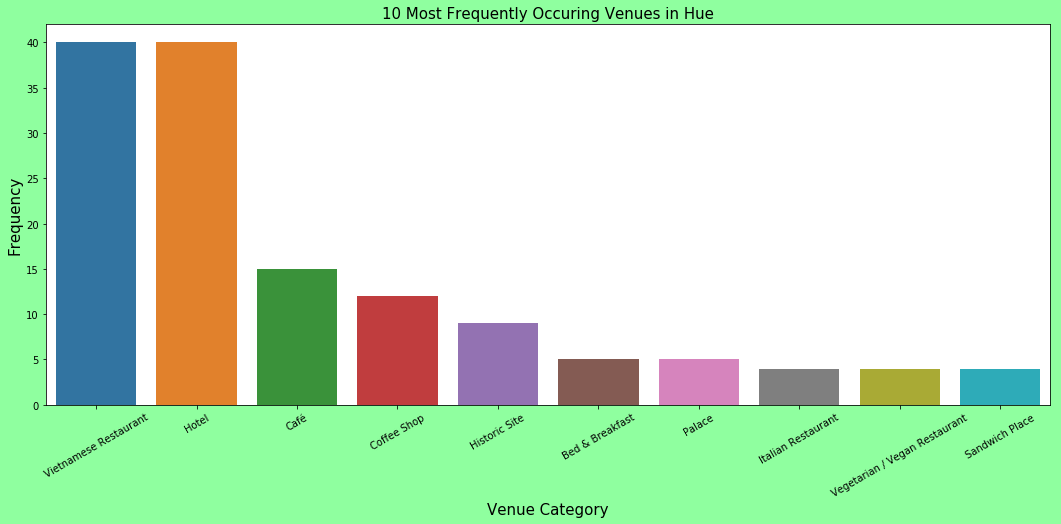

In [43]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
fig.patch.set_facecolor('xkcd:mint green')
s=sns.barplot(x="Venue_Category", y="Frequency", data=Hue_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Hue', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

Vietnamese Restaurant is one of the Most Frequent Venues in Hue City

In [45]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Hue_Dist_Venues_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

### add district column back to dataframe
Hue_Dist_Venues_onehot['Ward'] = venues_df['Ward'] 
### move district column to the first column
fixed_columns = [Hue_Dist_Venues_onehot.columns[-1]] + list(Hue_Dist_Venues_onehot.columns[:-1])
Hue_Dist_Venues_onehot = Hue_Dist_Venues_onehot[fixed_columns]

Hue_Dist_Venues_onehot.head(3)

,Ward,Art Gallery,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Boat or Ferry,Bookstore,Breakfast Spot,Bus Station,Café,Campground,Castle,Coffee Shop,Creperie,Dessert Shop,Dive Bar,Fast Food Restaurant,Food Court,Food Service,Food Truck,French Restaurant,Garden,Historic Site,History Museum,Hotel,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Lottery Retailer,Lounge,Market,Monument / Landmark,Movie Theater,Night Market,Noodle House,Palace,Park,Pub,Resort,Sandwich Place,Seafood Restaurant,Shopping Mall,Souvenir Shop,Sports Bar,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,An Cựu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,An Cựu,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,An Cựu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
Hue_Dist_Venues_onehot_Grouped = Hue_Dist_Venues_onehot.groupby('Ward').mean().reset_index()
Hue_Dist_Venues_onehot_Grouped.index = np.arange(1, len(Hue_Dist_Venues_onehot_Grouped)+1)
Hue_Dist_Venues_onehot_Grouped.head()

,Ward,Art Gallery,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Boat or Ferry,Bookstore,Breakfast Spot,Bus Station,Café,Campground,Castle,Coffee Shop,Creperie,Dessert Shop,Dive Bar,Fast Food Restaurant,Food Court,Food Service,Food Truck,French Restaurant,Garden,Historic Site,History Museum,Hotel,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Lottery Retailer,Lounge,Market,Monument / Landmark,Movie Theater,Night Market,Noodle House,Palace,Park,Pub,Resort,Sandwich Place,Seafood Restaurant,Shopping Mall,Souvenir Shop,Sports Bar,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,An Cựu,0.0,0.000000,0.000000,0.000000,0.125000,0.000000,0.0,0.000,0.0,0.000000,0.125,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.125000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.25,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.125,0.000000
2,Hương Sơ,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.000,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000000
3,Kim Long,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.25,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.750000
4,Phú Bình,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.125,0.0,0.000000,0.000,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.125000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.0,0.125000,0.0,0.0,0.0,0.000000,0.000,0.250000
5,Phú Hòa,0.0,0.028571,0.028571,0.028571,0.028571,0.028571,0.0,0.000,0.0,0.028571,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.028571,0.028571,0.342857,0.0,0.028571,0.057143,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.00,0.028571,0.0,0.028571,0.0,0.028571,0.0,0.0,0.0,0.028571,0.000,0.228571


In [47]:
num_top_venues = 5

for places in Hue_Dist_Venues_onehot_Grouped['Ward']:
    print("---------"+places+"---------")
    temp = Hue_Dist_Venues_onehot_Grouped[Hue_Dist_Venues_onehot_Grouped['Ward'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---------An Cựu---------
                           Venue  Freq
0                           Café  0.25
1                  Movie Theater  0.25
2                          Hotel  0.12
3  Vegetarian / Vegan Restaurant  0.12
4                Bed & Breakfast  0.12


---------Hương Sơ---------
                Venue  Freq
0         Coffee Shop   1.0
1         Art Gallery   0.0
2               Hotel   0.0
3   Indian Restaurant   0.0
4  Italian Restaurant   0.0


---------Kim Long---------
                           Venue  Freq
0          Vietnamese Restaurant  0.75
1                   Noodle House  0.25
2  Vegetarian / Vegan Restaurant  0.00
3                  Movie Theater  0.00
4              Indian Restaurant  0.00


---------Phú Bình---------
                   Venue  Freq
0  Vietnamese Restaurant  0.25
1          Historic Site  0.12
2       Lottery Retailer  0.12
3          Boat or Ferry  0.12
4         Sandwich Place  0.12


---------Phú Hòa---------
                   Venue  Freq
0      

#### Create a DataFrame with Top 10 Venues for Each Ward 

In [48]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]






num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Ward']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Ward_top10_venues_sorted = pd.DataFrame(columns=columns)
Ward_top10_venues_sorted['Ward'] = Hue_Dist_Venues_onehot_Grouped['Ward']

for ind in np.arange(Hue_Dist_Venues_onehot_Grouped.shape[0]):
  Ward_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Hue_Dist_Venues_onehot_Grouped.iloc[ind, :], num_top_venues)

    
Ward_top10_venues_sorted.index = np.arange(1, len(Ward_top10_venues_sorted)+1)
Ward_top10_venues_sorted.head(5)

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,An Cựu,Movie Theater,Café,Vegetarian / Vegan Restaurant,Hotel,Bed & Breakfast,Bus Station,Castle,Food Truck,Food Service,Food Court
2,Hương Sơ,Coffee Shop,Vietnamese Restaurant,Campground,French Restaurant,Food Truck,Food Service,Food Court,Fast Food Restaurant,Dive Bar,Dessert Shop
3,Kim Long,Vietnamese Restaurant,Noodle House,Campground,French Restaurant,Food Truck,Food Service,Food Court,Fast Food Restaurant,Dive Bar,Dessert Shop
4,Phú Bình,Vietnamese Restaurant,Sandwich Place,Food Service,Lottery Retailer,Boat or Ferry,Café,Historic Site,Bakery,French Restaurant,Food Truck
5,Phú Hòa,Hotel,Vietnamese Restaurant,Italian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Breakfast Spot,Historic Site


In [0]:
Hue_Dist_Venues_onehot_unique = Hue_Dist_Venues_onehot['Ward'].unique()

[0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 5, 2]


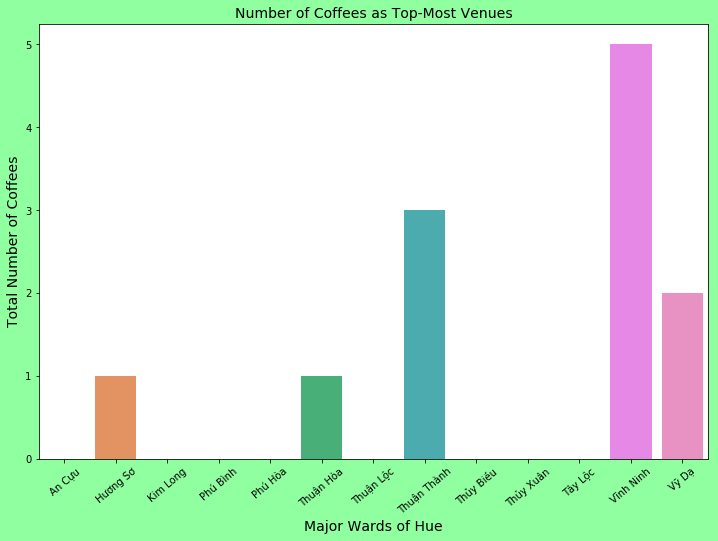

In [51]:
#try groupby to play with Coffee 
Hue_Dist_Venues_Coffee = venues_df.groupby(['Ward'])['VenueCategory'].apply(lambda x: x[x.str.contains('Coffee')].count())
Hue_Dist_Venues_Coffee_df = Hue_Dist_Venues_Coffee.to_frame().reset_index()
Hue_Dist_Venues_Coffee_df.columns = ['Ward', 'Number of Coffee']
#Hue_Dist_Venues_Coffee.columns = ['Ward', 'Number of Coffee']
#print (type(Hue_Dist_Venues_Coffee))
Hue_Dist_Venues_Coffee_df.index = np.arange(1, len(Hue_Dist_Venues_Coffee_df)+1)

#print ("shape of the dataframe: ", Hue_Dist_Venues_Coffee_df.shape)
#print (Hue_Dist_Venues_Coffee_df.head(5))
#print (type(Hue_Dist_Venues_Coffee_df[['Number of Coffee']]))
list_rest_no = Hue_Dist_Venues_Coffee_df['Number of Coffee'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
fig.patch.set_facecolor('xkcd:mint green')
bar = sns.barplot(x='Ward', y='Number of Coffee', data=Hue_Dist_Venues_Coffee_df)

bar.set_ylabel("Total Number of Coffees", fontsize=14)
bar.set_xlabel("Major Wards of Hue", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Coffees as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

[2, 0, 0, 1, 0, 3, 3, 3, 0, 0, 0, 3, 0]


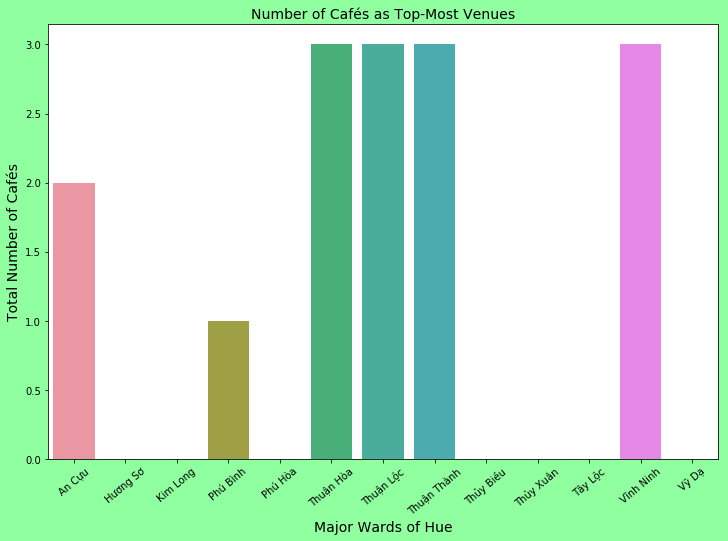

In [50]:
#try groupby to play with Café 
Hue_Dist_Venues_Café = venues_df.groupby(['Ward'])['VenueCategory'].apply(lambda x: x[x.str.contains('Café')].count())
Hue_Dist_Venues_Café_df = Hue_Dist_Venues_Café.to_frame().reset_index()
Hue_Dist_Venues_Café_df.columns = ['Ward', 'Number of Café']
#Hue_Dist_Venues_Café.columns = ['Ward', 'Number of Café']
#print (type(Hue_Dist_Venues_Café))
Hue_Dist_Venues_Café_df.index = np.arange(1, len(Hue_Dist_Venues_Café_df)+1)

#print ("shape of the dataframe: ", Hue_Dist_Venues_Café_df.shape)
#print (Hue_Dist_Venues_Café_df.head(5))
#print (type(Hue_Dist_Venues_Café_df[['Number of Café']]))
list_rest_no = Hue_Dist_Venues_Café_df['Number of Café'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
fig.patch.set_facecolor('xkcd:mint green')
bar = sns.barplot(x='Ward', y='Number of Café', data=Hue_Dist_Venues_Café_df)

bar.set_ylabel("Total Number of Cafés", fontsize=14)
bar.set_xlabel("Major Wards of Hue", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Cafés as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

[1, 0, 3, 2, 11, 3, 2, 2, 0, 3, 2, 20, 6]


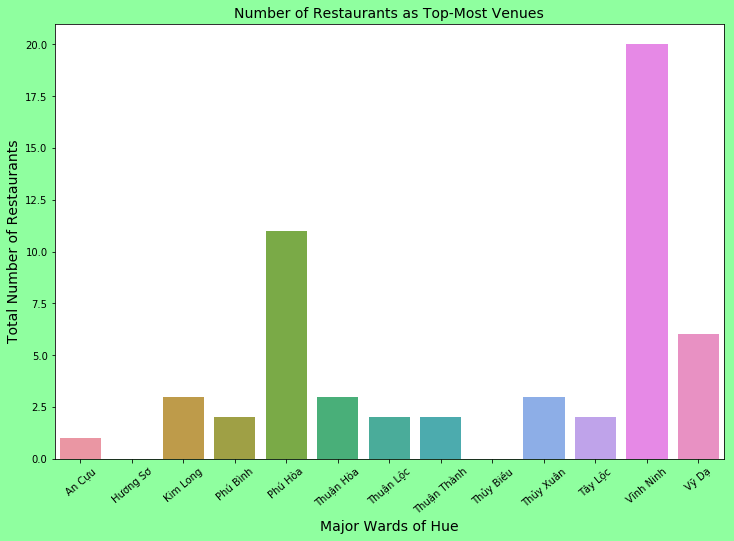

In [49]:
#try groupby to play with restaurant 
Hue_Dist_Venues_restaurant = venues_df.groupby(['Ward'])['VenueCategory'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Hue_Dist_Venues_restaurant_df = Hue_Dist_Venues_restaurant.to_frame().reset_index()
Hue_Dist_Venues_restaurant_df.columns = ['Ward', 'Number of Restaurant']
#Hue_Dist_Venues_restaurant.columns = ['Ward', 'Number of Restaurant']
#print (type(Hue_Dist_Venues_restaurant))
Hue_Dist_Venues_restaurant_df.index = np.arange(1, len(Hue_Dist_Venues_restaurant_df)+1)

#print ("shape of the dataframe: ", Hue_Dist_Venues_restaurant_df.shape)
#print (Hue_Dist_Venues_restaurant_df.head(5))
#print (type(Hue_Dist_Venues_restaurant_df[['Number of Restaurant']]))
list_rest_no = Hue_Dist_Venues_restaurant_df['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
fig.patch.set_facecolor('xkcd:mint green')
bar = sns.barplot(x='Ward', y='Number of Restaurant', data=Hue_Dist_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Major Wards of Hue", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

Clustering the Tokyo Districts (Neighborhoods) using K-Means

In [52]:
# set number of clusters
kclusters = 3

Hue_grouped_clustering = Hue_Dist_Venues_onehot_Grouped.drop('Ward', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Hue_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 3 Cluster labels :",  kmeans.labels_[0:3]) 


Check the 3 Cluster labels : [0 2 1]


In [53]:
#Ward_top10_venues_sorted
# add clustering labels

Ward_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Hue_5_Dist_Coordinate_Cluster_merged = df

#merge the inital Hue Dataframe with Sorted Most Visited places for each neighborhood

Hue_5_Dist_Coordinate_Cluster_merged = Hue_5_Dist_Coordinate_Cluster_merged.join \
                                        (Ward_top10_venues_sorted.set_index('Ward'), on='Ward')

Hue_5_Dist_Coordinate_Cluster_merged.head() 

,Ward,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,An Cựu,16.4574892,107.6002023,0.0,Movie Theater,Café,Vegetarian / Vegan Restaurant,Hotel,Bed & Breakfast,Bus Station,Castle,Food Truck,Food Service,Food Court
1,An Đông,16.4248801,107.6469586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,An Hòa,16.4248801,107.6469586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hương Long,16.4248801,107.6469586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hương Sơ,16.4924722,107.5119899,2.0,Coffee Shop,Vietnamese Restaurant,Campground,French Restaurant,Food Truck,Food Service,Food Court,Fast Food Restaurant,Dive Bar,Dessert Shop


In [0]:
Hue_merged_not_NAN = Hue_5_Dist_Coordinate_Cluster_merged[Hue_5_Dist_Coordinate_Cluster_merged["Cluster Label"].notnull()]

In [55]:
Hue_merged_not_NAN

,Ward,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,An Cựu,16.4574892,107.6002023,0.0,Movie Theater,Café,Vegetarian / Vegan Restaurant,Hotel,Bed & Breakfast,Bus Station,Castle,Food Truck,Food Service,Food Court
4,Hương Sơ,16.4924722,107.5119899,2.0,Coffee Shop,Vietnamese Restaurant,Campground,French Restaurant,Food Truck,Food Service,Food Court,Fast Food Restaurant,Dive Bar,Dessert Shop
5,Kim Long,16.4642271,107.559751,1.0,Vietnamese Restaurant,Noodle House,Campground,French Restaurant,Food Truck,Food Service,Food Court,Fast Food Restaurant,Dive Bar,Dessert Shop
6,Phú Bình,16.4885976,107.5762144,0.0,Vietnamese Restaurant,Sandwich Place,Food Service,Lottery Retailer,Boat or Ferry,Café,Historic Site,Bakery,French Restaurant,Food Truck
7,Phú Hòa,16.471216,107.5868958,0.0,Hotel,Vietnamese Restaurant,Italian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Breakfast Spot,Historic Site
9,Tây Lộc,16.4772416,107.5637146,0.0,Food Truck,Shopping Mall,Hotpot Restaurant,Food Court,Fast Food Restaurant,Noodle House,Breakfast Spot,Vietnamese Restaurant,Campground,Food Service
10,Thuận Hòa,16.4674072,107.5710217,0.0,Café,Vietnamese Restaurant,Palace,Historic Site,Juice Bar,Coffee Shop,Castle,French Restaurant,Monument / Landmark,Shopping Mall
11,Thuận Lộc,16.4831435,107.572616,0.0,Café,Vietnamese Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Food Service,Historic Site,Souvenir Shop,Bar,Coffee Shop,BBQ Joint
12,Thuận Thành,16.4748538,107.5812484,0.0,Historic Site,Café,Coffee Shop,Vietnamese Restaurant,Palace,Monument / Landmark,Bookstore,Castle,Creperie,Dessert Shop
13,Thủy Biều,16.4094987,107.5770314,0.0,Art Gallery,Lake,Campground,Bakery,Coffee Shop,French Restaurant,Food Truck,Food Service,Food Court,Fast Food Restaurant


In [56]:
# create map
address = 'Thành Phố Huế, Thừa Thiên Huế, Việt Nam'#'thanh pho Hue, Thua Thien Hue, Vietnam' - 'Phường Kim Long, Thành phố Huế, Thừa Thiên Huế, Việt Nam'
geolocator = Nominatim(user_agent="Thua Thien Hue, Vietnam")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for latitude, longitude, poi, cluster in zip(Hue_merged_not_NAN['Latitude'], 
                                  Hue_merged_not_NAN['Longitude'], 
                                  Hue_merged_not_NAN['Ward'], 
                                  Hue_merged_not_NAN['Cluster Label']):
  lat=float(latitude)
  lng=float(longitude)
  label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)    
  folium.CircleMarker(
        [lat,lng],
        radius=8,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
  #print(lat, lng, poi, cluster) 

map_clusters

The geograpical coordinates of Thành Phố Huế, Thừa Thiên Huế, Việt Nam are 16.4691541, 107.5780045.


Explore the 3 Clusters - Hue_merged_not_NAN

## Cluster 1

In [57]:
Hue_merged_not_NAN.loc[Hue_merged_not_NAN['Cluster Label'] == 0, Hue_merged_not_NAN.columns[[0]+list(range(4, Hue_merged_not_NAN.shape[1]))]]

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,An Cựu,Movie Theater,Café,Vegetarian / Vegan Restaurant,Hotel,Bed & Breakfast,Bus Station,Castle,Food Truck,Food Service,Food Court
6,Phú Bình,Vietnamese Restaurant,Sandwich Place,Food Service,Lottery Retailer,Boat or Ferry,Café,Historic Site,Bakery,French Restaurant,Food Truck
7,Phú Hòa,Hotel,Vietnamese Restaurant,Italian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Breakfast Spot,Historic Site
9,Tây Lộc,Food Truck,Shopping Mall,Hotpot Restaurant,Food Court,Fast Food Restaurant,Noodle House,Breakfast Spot,Vietnamese Restaurant,Campground,Food Service
10,Thuận Hòa,Café,Vietnamese Restaurant,Palace,Historic Site,Juice Bar,Coffee Shop,Castle,French Restaurant,Monument / Landmark,Shopping Mall
11,Thuận Lộc,Café,Vietnamese Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Food Service,Historic Site,Souvenir Shop,Bar,Coffee Shop,BBQ Joint
12,Thuận Thành,Historic Site,Café,Coffee Shop,Vietnamese Restaurant,Palace,Monument / Landmark,Bookstore,Castle,Creperie,Dessert Shop
13,Thủy Biều,Art Gallery,Lake,Campground,Bakery,Coffee Shop,French Restaurant,Food Truck,Food Service,Food Court,Fast Food Restaurant
15,Vỹ Dạ,Hotel,Vietnamese Restaurant,Coffee Shop,Lounge,BBQ Joint,Vegetarian / Vegan Restaurant,Bed & Breakfast,Resort,Italian Restaurant,Food Service
16,Vĩnh Ninh,Hotel,Vietnamese Restaurant,Coffee Shop,Café,Bakery,Bed & Breakfast,Noodle House,Breakfast Spot,Dive Bar,Vegetarian / Vegan Restaurant


## Cluster 2

In [58]:
Hue_merged_not_NAN.loc[Hue_merged_not_NAN['Cluster Label'] == 1, Hue_merged_not_NAN.columns[[0]+list(range(4, Hue_merged_not_NAN.shape[1]))]]

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Kim Long,Vietnamese Restaurant,Noodle House,Campground,French Restaurant,Food Truck,Food Service,Food Court,Fast Food Restaurant,Dive Bar,Dessert Shop
14,Thủy Xuân,Vietnamese Restaurant,Seafood Restaurant,Historic Site,Campground,French Restaurant,Food Truck,Food Service,Food Court,Fast Food Restaurant,Dive Bar


## Cluster 3

In [59]:
Hue_merged_not_NAN.loc[Hue_merged_not_NAN['Cluster Label'] == 2, Hue_merged_not_NAN.columns[[0]+list(range(4, Hue_merged_not_NAN.shape[1]))]]

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hương Sơ,Coffee Shop,Vietnamese Restaurant,Campground,French Restaurant,Food Truck,Food Service,Food Court,Fast Food Restaurant,Dive Bar,Dessert Shop


Most of the neighborhoods fall into Cluster 2 which are mostly business areas with Vietnamese Restaurant. Cluster 1 is only 2 1st Most Common Venue with Cafe. In cluster 3, Coffee Shop is the number one of most common Venue
	